# Intégration numérique avec Julia, une introduction

## Introduction

Pour la documentation voir
[Documentation of DifferentialEquations.jl](https://diffeq.sciml.ai/stable/)

Il nous faut tout d'abord importer les bons packages de Julia.

In [2]:
# import Pkg; Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
using DifferentialEquations
using Plots

## Exemple 1

Nous allons ici résoudre le problème à valeur initiale
$$(IVP)\left\{\begin{array}{l}
\dot{x}_1(t)=x_1(t)+x_2(t)+\sin t\\
\dot{x}_2(t)=-x_1(t)+3x_2(t)\\
x_1(0)=-9/25\\
x_2(0)=-4/25,
\end{array}\right.
$$

- Ecrire la fonction $f$ qui permet d'écrire l'équation différentielle sous la forme $\dot{x}(t)=f(t,x(t))$.
- Vérifier que la solution de $(IVP$ est
$$\begin{align*}
x_1(t)&= (-1/25)(13\sin t+9\cos t)\\
x_2(t)&= (-1/25)(3\sin t+4\cos t).
\end{align*}$$
- Coder la fonction $f$.

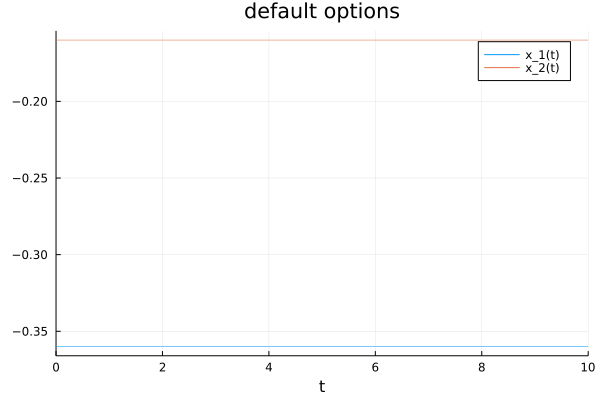

In [6]:
# Remarque : 
# un problème IVP est une équation différentielle ordinaire 
# (EDO en français, ODE en anglais)
# avec en plus une condition initiale.

function exemple1(x,p,t)
# Second membre de l'IVP
# p : vecteur de paramètres
# t : variable de temps
    xpoint = similar(x)
    
    # A COMPLETER/MODIFIER
    xpoint = zeros(size(x))
    
    return xpoint
end

p  = [] # pas de paramètres

t0 = 0.
tf = 10
tspan = (t0, tf) # intervalle d'intégration

x0   = [-9/25; -4/25] # condition initiale

prob = ODEProblem(exemple1, x0, tspan, p)  # définition du problème IVP
sol  = solve(prob) # résolution du problème IVP
p1   = plot(sol, label = ["x_1(t)" "x_2(t)"], title = "default options", lw = 0.5) # affichage de la solution

## Le contrôle du pas
Les bons intégrateurs numériques ont une mise à jour automatique du pas. Pour les 
[méthodes de Runge-Kutta](https://fr.wikipedia.org/wiki/Méthodes_de_Runge-Kutta) 
par exemple, sur un pas $[t_0, t_{1}]$ on calcule par 2 schémas différents deux solutions approchées à l'instant $t_{1}$ : $x_{1}$ et $\hat{x}_{1}$ dont l'erreur local est respectivement en $O(h^p)$ et $O(h^{p+1})$ (les erreurs globales sont elles en $O(h^{p-1})$ et $O(h^p)$). Ainsi on peut estimer l'erreur locale du schéma le moins précis à l'aide de la différence $x_{1}-\hat{x}_{1}$. On peut alors estimer le pas de façon à avoir la norme de cette différence inférieure à une tolérance donnée $Tol$ ou encore à avoir 
$$\frac{\|x_{1}-\hat{x}_{1}\|}{Tol}<1.$$

En pratique on considère des tolérences absolue et relative composante par composante et on définit : $sc_i = Atol_i + \max(|x_{0i}|,|x_{1i}|)Rtol_i$. On calcule alors le pas de façon à avoir 

$$err = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(\frac{x_{1i}-\hat{x}_{1i}}{sc_i}\right)^2}<1.$$


Référence : [Hairer, Nørsett, Wanner (2008) Solving Ordinary Differential Equations I Nonstiff Problems DOI: 10.1007/978-3-540-78862-1](https://link.springer.com/book/10.1007/978-3-540-78862-1)

Dans `Julia`, on peut modifier les valeurs par défaut  : reltol = 1.e-3 et abstol = 1.e-6
(lorsque ces valeurs sont des scalaires, on considère les mêmes quantités pour toutes les composantes).

Réaliser l'intégration numérique pour 
- reltol = 1.e-3 et abstol = 1.e-6
- reltol = 1.e-6 et abstol = 1.e-9
- reltol = 1.e-10 et abstol = 1.e-15

et afficher les résultats en ajoutant la solution.

## Commentaires?

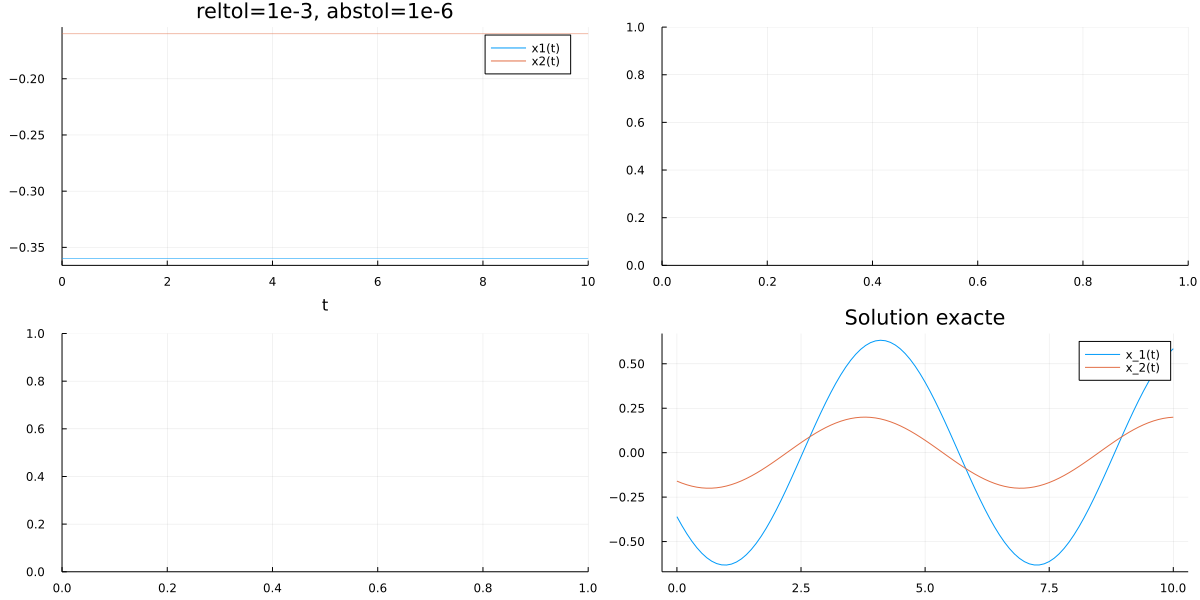

In [7]:
sol = solve(prob, reltol = 1.e-3, abstol = 1.e-6)
p1 = plot(sol, label = ["x1(t)" "x2(t)"], title = "reltol=1e-3, abstol=1e-6", lw = 0.5) # lw = linewidth
#
# A COMPLETER/MODIFIER
p2 = plot()
p3 = plot()

#
T = t0:(tf-t0)/100:tf
sinT = sin.(T)                                # opération vectorielle
cosT = cos.(T)
p4 = plot(T,[(-1/25)*(13*sinT+9*cosT) (-1/25)*(3*sinT+4*cosT)], label = ["x_1(t)" "x_2(t)"], title = "Solution exacte")
plot(p1,p2,p3,p4, size=(1200, 600))

## Pendule simple
### Introduction
On s'intéresse ici au pendule simple. Les principes physiques de la mécanique classique donnent comme équation qui régit l'évolution du mouvement

$$ ml^2\ddot{\alpha}(t)+mlg\sin(\alpha(t)) +k\dot{\alpha}(t)=0,$$
où $\ddot{\alpha}(t)$ désigne la dérivée seconde de l'angle $\alpha$ par rapport au temps $t$. 

- En prenant comme variable d'état qui décrit le système $x(t)=(x_1(t),x_2(t))=(\alpha(t), \dot{\alpha}(t))$, écrire la fonction $f$ qui permet d'écrire l'équation différentielle sous la forme $\dot{x}(t) = f(t,x(t))$
- Coder cette fonction

In [8]:
function pendule(x,p,t)
# Second membre de l'IVP
# p : vecteur de paramètres
# t : variable de temps. Ici le temps n'intervient pas explicitement.
    xpoint = similar(x)
    
    # A COMPLETER/MODIFIER
    xpoint = zeros(size(x))
        
    return xpoint  
end;

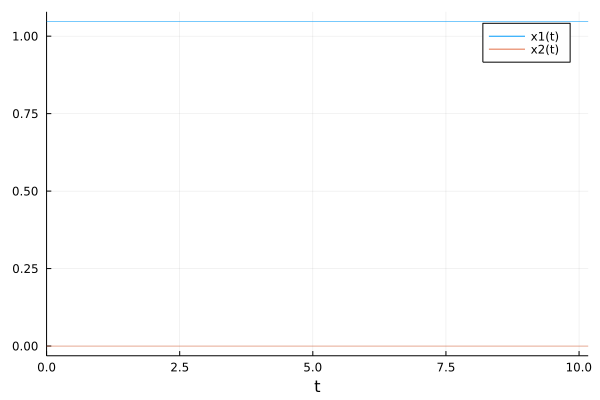

In [9]:
# Main
#
g = 9.81; l = 10; k = 0.; m = 1.;
p = [g, l, k, m] # paramètres constants

theta0 = pi/3
x0 = [theta0, 0.] # état initial

t0 = 0.
tf = 3*pi*sqrt(l/g)*(1 + theta0^2/16 + theta0^4/3072) # 2*approximation de la période
tspan = (t0, tf) # instant initial et terminal

prob = ODEProblem(pendule,x0,tspan,p) # défini le problème en Julia
sol = solve(prob) # réalise l'intégration numérique

plot(sol, label = ["x1(t)" "x2(t)"], lw = 0.5) # affichage de la solution

## Diagrammes de phases

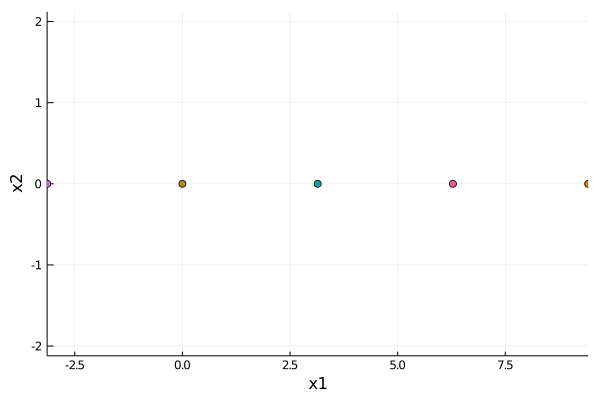

In [14]:
# Main
#
g = 9.81; l = 1.5; k = 0.; m = 1.;
p = [g, l, k, m] # paramètres constants

plot()
for theta0 in 0:(2*pi)/10:2*pi
    theta0_princ = theta0
    tf = 3*pi*sqrt(l/g)*(1 + theta0_princ^2/16 + theta0_princ^4/3072) # 2*approximation of the period
    tspan = (0.0,tf)
    x0 = [theta0 0]
    prob = ODEProblem(pendule, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x1", ylabel = "x2", legend = false, lw = 0.5, color="blue")  # lw = linewidth
end

theta0 = pi-10*eps()
x0 = [theta0 0]
tf = 50                              # problem for tf=50 1/4 of the period!
tspan = (0.0,tf)
prob = ODEProblem(pendule, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x1", ylabel = "x2", legend = false, lw = 0.5, color="green")  # lw = linewidth

theta0 = pi+10*eps()
x0 = [theta0 0]
tf = 50
tspan = (0.0,tf)
prob = ODEProblem(pendule, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x1", ylabel = "x2", legend = false, lw = 0.5, color="green")  # lw = linewidth

# circulation case
for thetapoint0 in 0:1.:4         
    tf = 10
    tspan = (0.,tf)
    x0 = [-pi thetapoint0]                # thetapoint0 > 0 so theta increases from -pi to ...
    prob = ODEProblem(pendule, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x1", ylabel = "x2", legend = false, lw = 0.5, color="red")  # lw = linewidth
end
for thetapoint0 in -4:1.:0
    tf = 10
    tspan = (0.,tf)
    x0 = [3*pi thetapoint0]              # thetapoint0 < 0 so theta decreases from 3pi to ...
    prob = ODEProblem(pendule, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x1", ylabel = "x2", legend = false, lw = 0.5, color="purple")  # lw = linewidth
end
plot!([-pi 0 pi 2*pi 3*pi], [0 0 0 0 0], seriestype=:scatter)
plot!(xlims = (-pi,3*pi), size=(900, 600))


- Interprétez ces graphiques
- On considère le cas où $k=0.15$ (on introduit un frotement). Que se passe-t-til?

## Modèle de Van der Pol
### Exemple de cycle limite
L'équation différentielle considérée est l'équation de Van der Pol
$$(IVP)\left\{\begin{array}{l}
\dot{y}_1(t)=y_2(t)\\
\dot{y}_2(t)=(1-y_1^2(t))y_2(t)-y_1(t)\\
y_1(0)=2.00861986087484313650940188\\
y_2(0)=0
\end{array}\right.
$$
$t_f=T=6.6632868593231301896996820305$


La solution de ce problème de Cauchy est périodique de période $T$.

Résoudre et de visualiser la solution pour les points de départ :
- x0 = [2.00861986087484313650940188,0]
- [x01 , 0] pour x01 dans -2:0.4:0
- [0 , x02] pour x02 dans 2:1:4



In [15]:
function vdp(x,p,t)
# Van der Pol model
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x

    xpoint = similar(x)
    
    # A COMPLETER/MODIFIER
    xpoint = zeros(size(x))
    
    return xpoint
end;

x0 = [2.0086198608748433, 0.0], p = [1], tspan = (0.0, 6.66328685932313)


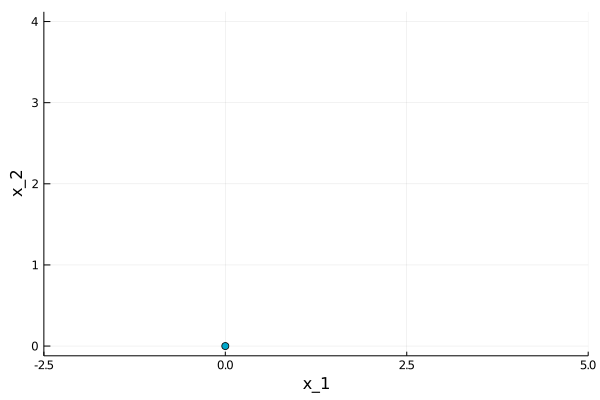

In [16]:
# Main
#
t0 = 0.;
tf = 6.6632868593231301896996820305
tspan = (t0, tf)
mu = 1; p = [mu]

plot()

# Trajecctoires intérieures
for x01 in -2:0.4:0
    x0 = [x01,0]
    prob = ODEProblem(vdp, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false, color = "blue") 
end

# Trajecctoires extérieures
for x02 in 2.5:0.5:4
    x0 = [0.,x02]
    prob = ODEProblem(vdp, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false, color = "green")
end

# Trajecctoires périodique
x0 = [2.00861986087484313650940188,0]
prob = ODEProblem(vdp, x0, tspan, p, reltol = 1.e-8, abstol = 1.e-8)
sol  = solve(prob)
plot!(sol, vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false, color = "red", lw = 2.)

#
plot!([0], [0], seriestype=:scatter)        # point visualisation
plot!(xlims = (-2.5,5), size=(900, 600))

## Flots en dimension 2

### Flot des extrémales pour le problème de contrôle optimal 

On considère le problème de contrôle optimal suivant:

$$ \frac{1}{2}\int_0^{1} u^2(t)\,\mathrm{d}t \to \min, $$

sous les contraintes

$$ \dot{x}(t) = -x(t) + u(t)$$

$$ x(0)=x_0=-1,\quad x(1)=0. $$

Le but est ici de tracer les extrémales et le flot associé pour des points initiaux $z(0) = (x_0, p(0))$.

In [18]:
function plot_traj(plt,f,Z0,tf; par=[])
    """ 
    Plot the trajectories in the phase plan of the ode dot{x}(t)=f(t,z(t))
    The initial points are in the matrix `Z0`
    -------
    
    parameters (input)
    ------------------
    plt : plot object
    f  : function f(x,p,t)
    Z0 : array of float(n,nbpoints)
         Z0[:,i] = initial point number i
    returns
    -------
    nothing
    """
    nbpoints = size(Z0,2)
    tspan = (0. , tf)
    for i in 1:nbpoints                      
        prob = ODEProblem(f,Z0[:,i],tspan,par)          # défini le problème en Julia
        sol = solve(prob)
        plot!(plt, sol, vars = (1,2),legend = false, color = :blue) # lw = linewidth
     end
    return nothing
end   

plot_traj (generic function with 1 method)

In [22]:
function plot_flow(plt,f,Z0,tf; par=[])
    """ 
    plot the flows of the ode dot{x}(t)=f(t,z(t))
    The initial points are in the matrix `Z0`
    -------
    
    parameters (input)
    ------------------
    plt : plot object
    f  : function f(x,p,t)
    Z0 : array of float(n,nbpoints)
         Z0[:,i] = initial point number i
    returns
    -------
    nothing
    """
    nbpoints = size(Z0,2)
    tspan = (0. , tf)
    T = range(0.,tf,length=4)
    for i in 1:nbpoints                      
        # TO COMPLETE
        
    end
    return nothing
end;

- Compléter la fonction suivante pour tracer le flot pour 4 valeurs de $t$

Remarque : `sol(t)` donne la valeur de l'approximation de la solution à l'instant $t$

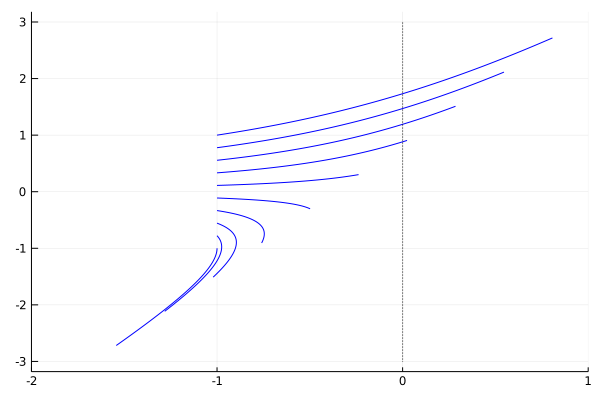

In [23]:
function fun1(z,p,t)
    zpoint = similar(z)
    zpoint[1] = -z[1] + z[2]
    zpoint[2] = z[2]
    return zpoint
end

t0 = 0; tf = 1.;

seg = range(-1.,1.,length=10)
Z0 = transpose([-ones(size(seg)) seg])
plt1 = plot()
plot_traj(plt1,fun1,Z0,tf)

seg = range(-1.,1.,length=200)
Z0 = transpose([-ones(size(seg)) seg])
plot_flow(plt1,fun1,Z0,tf)
plot!(plt1, xlims = (-2.,1))
plot!(plt1,[0.,0.],[-3.,3], linestyle = :dot, color = :black)

- Retrouvez graphiquement la solution du problème de contrôle optimal
- La droite de départ se transforme par le plot en une droite, pourquoi?

### Flot des extrémales pour le problème de conrôle optimal 

On considère le problème de contrôle optimal suivant:

$$ \frac{1}{2}\int_0^{1} u^2(t)\,\mathrm{d}t \to \min, $$

sous les contraintes

$$ \dot{x}(t) = -x(t) + \alpha x^2(t) + u(t)$$

$$ x(0)=x_0=-1,\quad x(1)=0. $$

Le but est ici de tracer les extrémales et le flot associé pour des points initiaux $z(0) = (x_0, p(0))$.

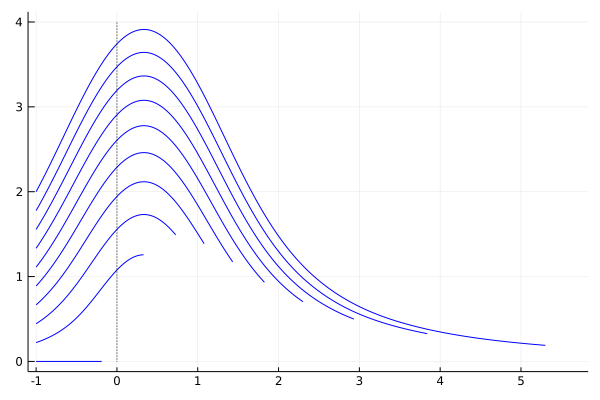

In [24]:
function fun2(z,p,t)
    α = p
    zpoint = similar(z)
    zpoint[1] = -z[1] + α*z[1]^2 + z[2]
    zpoint[2] = (1. - 2*α*z[1])*z[2]
    return zpoint
end

t0 = 0; tf = 1.;
α = 1.5
seg = range(-0.,2,length=10)
Z0 = transpose([-ones(size(seg)) seg])
plt1 = plot()
plot_traj(plt1,fun2,Z0,tf,par=α)

seg = range(-0.,2,length=200)
Z0 = transpose([-ones(size(seg)) seg])
plot_flow(plt1,fun2,Z0,tf,par=α)
#plot!(plt1, xlims = (-2.,1))
plot!(plt1,[0.,0.],[0.,4], linestyle = :dot, color = :black)
plot(plt1)